# In this exercise, we will generate a network from the Deutsche Bahn GTFS data, which is not in pajek format.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Read relevant files as pandas dataframe
# path = r'/Users/xyzjayne/Documents/CP290E/Lecture Files/Feb 20/DB_gtfs'
path = ''
routes = pd.read_csv('routes.txt')
stops = pd.read_csv('stops.txt')
stop_times = pd.read_csv('stop_times.txt')
trips = pd.read_csv('trips.txt')

In [3]:
# What is in the stops file?
stops.head()

,stop_id,stop_name,stop_lat,stop_lon
0,8005644,St Georgen(Schwarzw),48.123814,8.341953
1,8005661,Stadtallendorf,50.825432,9.015281
2,8005662,Stadthagen,52.332833,9.189429
3,8300580,Castiglione del Lago,43.122854,12.032484
4,8601645,Naestved st,55.231872,11.766924


In [4]:
# What is in the routes file?
routes.head()

,route_id,route_short_name,route_long_name,route_type,agency_id
0,0,NaN,IC 2376,2,DPN
1,1,NaN,IC 2371,2,DPN
2,2,NaN,IC 2375,2,DPN
3,3,NaN,IC 2276,2,DPN
4,4,NaN,IC 2274,2,DPN


In [5]:
# What is in the trips file?
trips.head()

,route_id,service_id,trip_id,trip_headsign
0,0,0,0,Stralsund Hbf
1,1,0,1,Karlsruhe Hbf
2,2,0,2,Karlsruhe Hbf
3,3,0,3,Hamburg-Altona
4,4,0,4,Hamburg-Altona


In [6]:
# What is in the stop_times file?
stop_times.head(20)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,0,07:02:00,07:02:00,8000191,0
1,0,07:07:00,07:09:00,8003184,1
2,0,07:22:00,07:24:00,8000055,2
3,0,07:34:00,07:36:00,8006421,3
4,0,07:44:00,07:46:00,8000156,4
5,0,07:59:00,08:00:00,8000377,5
6,0,08:08:00,08:09:00,8000031,6
7,0,08:22:00,08:24:00,8000068,7
8,0,08:40:00,08:42:00,8002041,8
9,0,09:14:00,09:16:00,8000111,9


## We create the network in three steps: adding nodes, adding node coordinates, adding edges.

In [7]:
# create an empty graph
G = nx.Graph()
# find the list that contains all the stops
stops['stop_id'].head(20)

0     8005644
1     8005661
2     8005662
3     8300580
4     8601645
5     8300601
6     8002570
7     8300615
8     8300556
9     8300618
10    8004669
11    8300628
12    8007768
13    8300633
14    8300634
15    8507483
16    8300636
17    8300638
18    8100197
19    8003680
Name: stop_id, dtype: int64

In [8]:
# add nodes
G.add_nodes_from(stops['stop_id'])

In [9]:
# create dictionaries of node coordinates and labels
pos = dict(G.nodes)
labels = dict(G.nodes)

for stop in pos:
    lon = float(stops[stops['stop_id'] == stop]['stop_lon'])
    lat = float(stops[stops['stop_id'] == stop]['stop_lat'])
    pos[stop] = (lon,lat)
    name = stops[stops['stop_id']==stop].stop_name.values[0]
    labels[stop] = unicode(name,'utf-8')

In [10]:
# add links
# What we want: a list of edge, in the form of tuples
# For example, something like edge_list = [(stop_A,stop_B),(stop_B,stop_C)]
# then we can do: G.add_edges_from(edge_list)

In [11]:
# For each route, pick one trip and the corresponding stop lists
route_ids = routes['route_id']
edge_list = {}

for route_id in route_ids:
    trip_ids = trips[trips.route_id == route_id]['trip_id']
    for trip_id in trip_ids:
    # extract the stop lists for each trip id from stop_times
        stop_list = list(stop_times[stop_times.trip_id == trip_id]['stop_id'])

        # for each list, generate the pairs of edges and append them to edge_list
        for i in range(0,len(stop_list)-1):
            edge_tuple = (stop_list[i],stop_list[i+1])

            if edge_tuple not in edge_list:
                edge_list[edge_tuple] = 1
            else: edge_list[edge_tuple] +=1

In [12]:
#add weights
edge_list_weighted =[]
for edge in edge_list:
    edge_list_weighted.append((edge[0],edge[1],edge_list[edge]))

In [13]:
G.add_weighted_edges_from(edge_list_weighted)

In [14]:
# Add some color for flow
colors = ['red' if G[u][v]['weight']>50 else 'green' for u,v in G.edges]

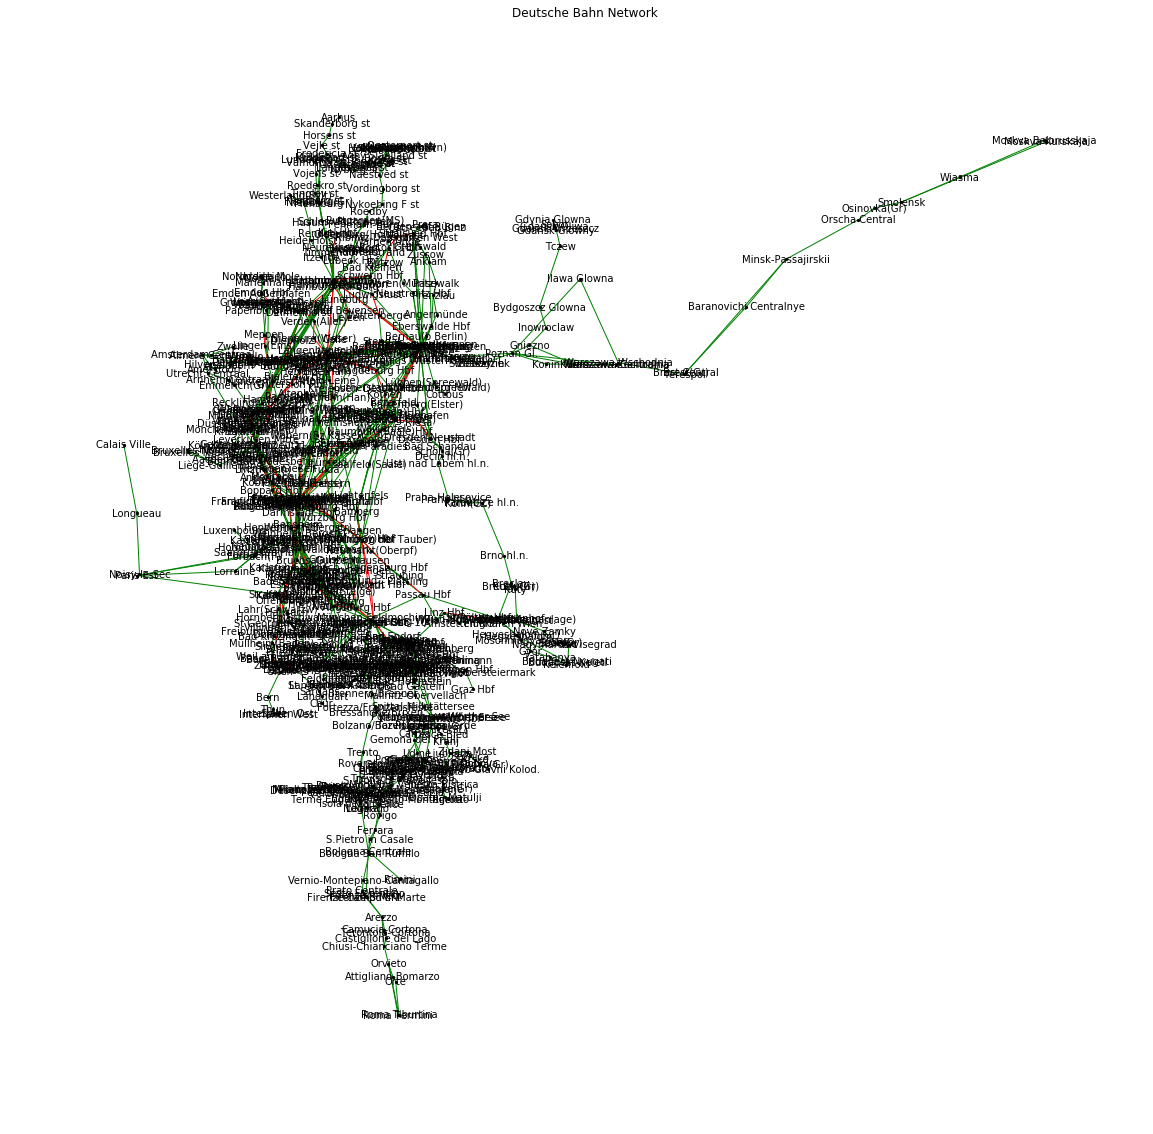

In [15]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G,pos = pos,font_size = 10,labels=labels,edge_color = colors ,with_labels=True, node_size = 5,node_color = 'black')
plt.axis('off')
plt.title('Deutsche Bahn Network')
plt.show()